

# 공공데이터 상권정보 분석해 보기


## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 

## 시각화를 위한 폰트 설정

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
#Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
#plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_1464\3547449024.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 데이터 로드하기


In [3]:
df = pd.read_csv("./소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", encoding='cp949')
df.shape

(91335, 39)

## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [4]:
df.head(1) # 괄호안에 숫자입력한 만큼 보여줌, 빈칸으로 둘 시 상위 5개 출력

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [5]:
df.tail(1) # 괄호안에 숫자입력한 만큼 보여줌, 빈칸으로 둘 시 하위 5개 출력

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.410000e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [6]:
df.sample() # .sample() 명령어는 무작위 데이터를 추출해주는 명령어 

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
24729,24105178,김연경내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,3.010000e+24,NaN,대전광역시 중구 계룡로 858,301829.0,34908.0,NaN,2.0,NaN,127.4098,36.324268


## 데이터 요약하기

### 요약정보

In [7]:
df.info() # .info() 명령어를 이용하면 columns 수와 타입, NULL값의 갯수를 확인할 수 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

### 컬럼명 보기

In [8]:
df.columns # .columns 명령어를 이용하면 컬럼명을 확인할 수 있다

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [9]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

## 결측치

In [10]:
df.isnull().sum() # .isnull()명령어를 이용하면 DataFrame 속 NULL값을 찾을 수 있다 .sum()명령어를 이용하면 합쳐서 편하게 볼 수 있다

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

<AxesSubplot:>

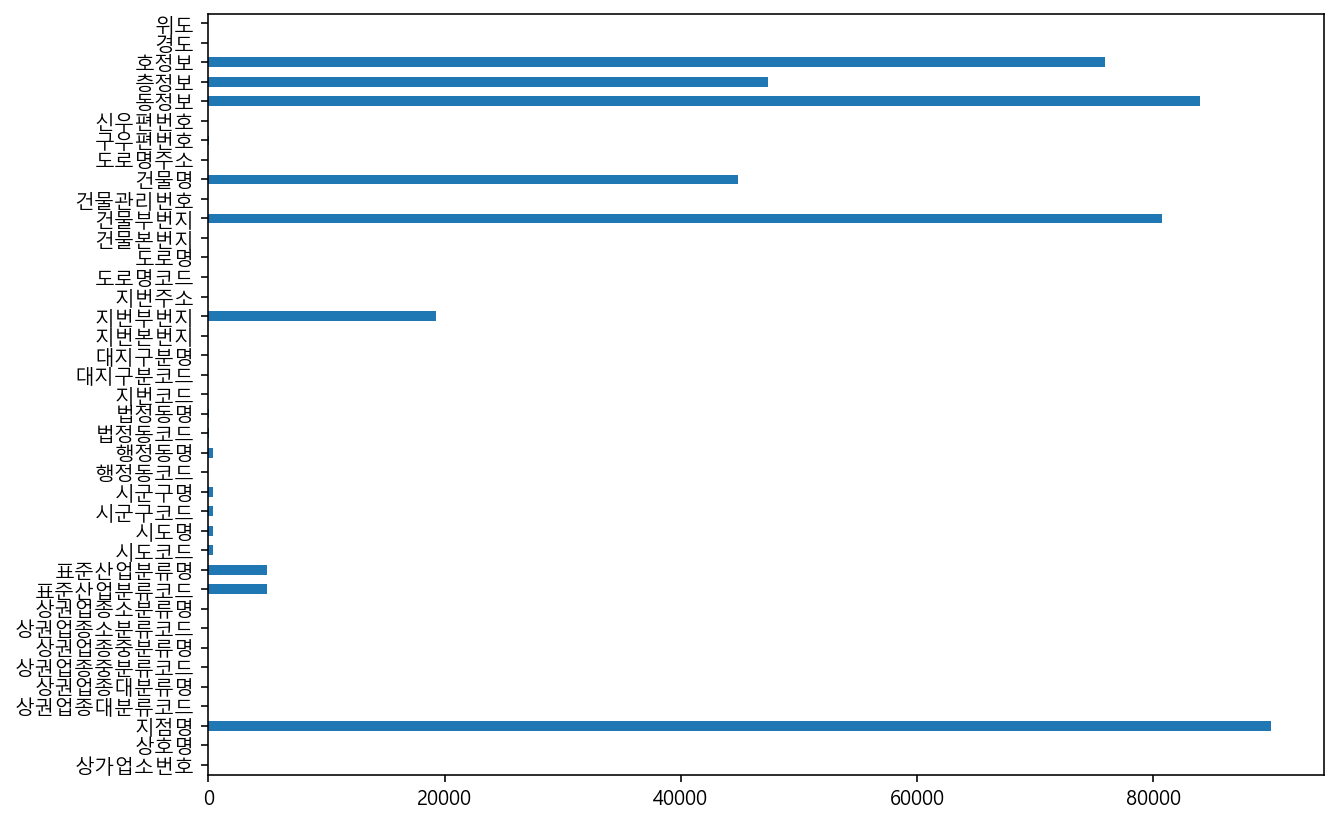

In [11]:
df.isnull().sum().plot.barh(figsize=(10, 7)) # 결측치들을 pandas 내장 그래프 함수 .plot을 이용해 그래프로 표현

In [12]:
df_null_count = df.isnull().sum().reset_index() # 결측치 제거를 위해 데이터를 추출후, .reset_index()명령어를 이용해 index를 초기화
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기

In [13]:
df_null_count.columns = ["컬럼명", "결측치수"] # 초기화된 index를 .columns 명령어를 이용해 원하는 컬럼명으로 변경
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


#### 정렬하기

In [14]:
df_null_head = df_null_count.sort_values(
    by="결측치수", ascending=False).head(9) # .sort_values() 명령어를 이용해 데이터들을 정렬
df_null_head                                 # 이 때 ascending = False를 이용해 내림차순으로 정렬 할 수 있다 (기본은 오름차순)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75898
35,층정보,47346
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922


#### 특정 컬럼 불러오기

In [15]:
df["지점명"] # 데이터프레임명['불러올컬럼명'] 을 이용해 특정 컬럼만 불러올 수 있다

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [16]:
drop_columns = df_null_head["컬럼명"].values
drop_columns

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], dtype=object)

In [17]:
df[drop_columns].head() # 결측치 제거를 위해 제거할 컬럼들을 추출

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업


#### 제거하기

In [18]:
print(df.shape)
df = df.drop(columns=drop_columns, axis=1) # drop 명령어를 이용해 제거, columns수가 39개에서 30개로 감소
print(df.shape)

(91335, 39)
(91335, 30)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구코드      90956 non-null  float64
 11  시군구명       90956 non-null  object 
 12  행정동코드      91335 non-null  int64  
 13  행정동명       90956 non-null  object 
 14  법정동코드      91280 non-null  float64
 15  법정동명       91280 non-null  object 
 16  지번코드       91335 non-null  float64
 17  대지구분코드     91335 non-null  int64  
 18  대지구분명      91335 non-null  object 
 19  지번본번지      91335 non-null  int64  
 20  지번주소  

###  기초 통계값 보기

#### 기초 통계 수치

In [20]:
df["위도"].mean() # .mean() 평균값

36.62471119236107

In [21]:
df["위도"].median() # .median() 중앙값

37.23465232

In [22]:
df["위도"].max() # .max() 최대값

38.49965857

In [23]:
df["위도"].min() # .min() 최소값

33.21928967

In [24]:
df["위도"].count() # .count() 데이터 갯수

91335

#### 기초통계값 요약하기 - describe

In [25]:
df["위도"].describe() # .describe를 이용해 값들을 요약해서 출력

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [26]:
df[["위도", "경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


#### 중복제거한 값 보기

In [27]:
df["상권업종대분류명"].unique() # .unique()함수는 데이터 고유값 종류 확인을 위해 사용

array(['의료'], dtype=object)

In [28]:
df["상권업종대분류명"].nunique() # .nunique()함수는 데이터 고유값 갯수 확인을 위해 사용

1

In [29]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [30]:
df["상권업종중분류명"].nunique()

5

In [31]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [32]:
df["상권업종소분류명"].nunique()

34

In [33]:
len(df["상권업종소분류명"].unique())

34

#### 그룹화된 요약값 보기 - value_counts

In [34]:
df["시도코드"].value_counts()

41.0    21374
11.0    18943
26.0     6473
48.0     4973
28.0     4722
27.0     4597
47.0     4141
45.0     3894
44.0     3578
46.0     3224
29.0     3214
30.0     3067
43.0     2677
42.0     2634
31.0     1997
50.0     1095
36.0      353
Name: 시도코드, dtype: int64

In [35]:
df["시도명"].value_counts() # .value_counts() 명령어를 이용해 지정된 열의 각 값에 대한 모든 발생횟수를 반환

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [36]:
# normalize=True 옵션을 사용하면 비율을 구함
df["시도명"].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

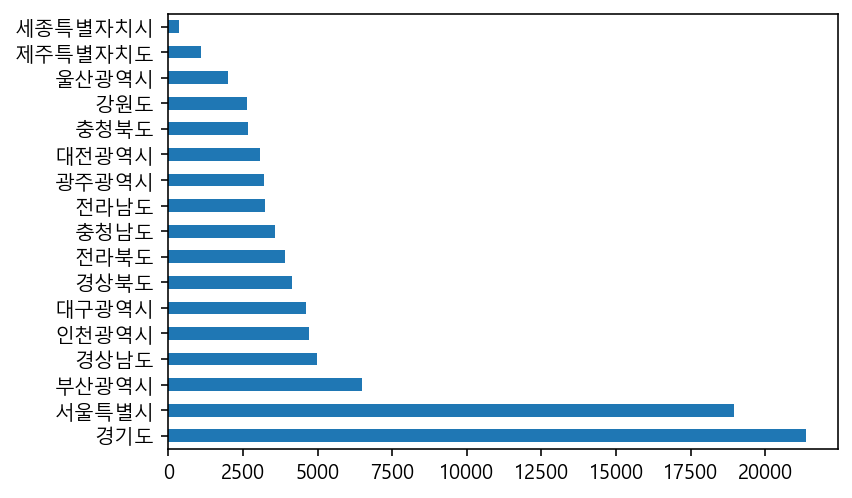

In [37]:
df["시도명"].value_counts().plot.barh() # .plot 함수를 이용해 그래프로 표현

<AxesSubplot:ylabel='시도명'>

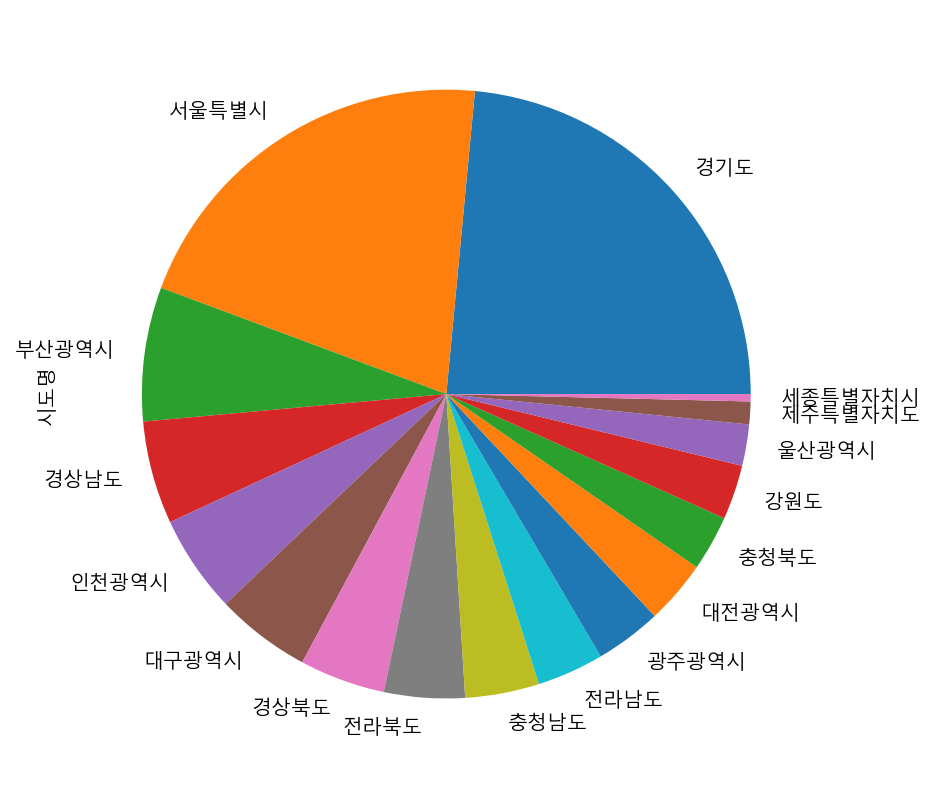

In [38]:
df["시도명"].value_counts().plot.pie(figsize=(7, 7)) # .plot.pie를 이용하면 파이그래프로 표현 가능

<AxesSubplot:xlabel='count', ylabel='시도명'>

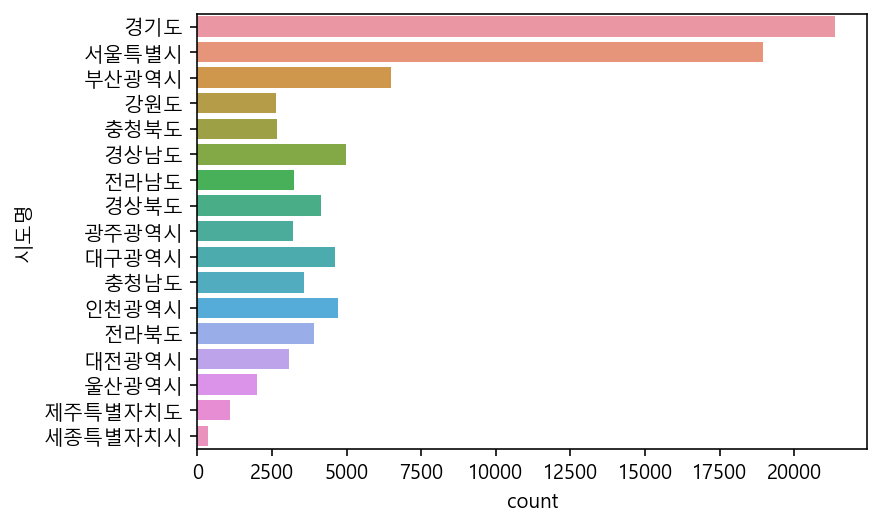

In [39]:
sns.countplot(data=df, y="시도명") # seaborn 라이브러리를 이용해 다양하게 표현 가능

In [40]:
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [41]:
df["상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [42]:
df["상권업종중분류명"].value_counts(normalize=True)

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

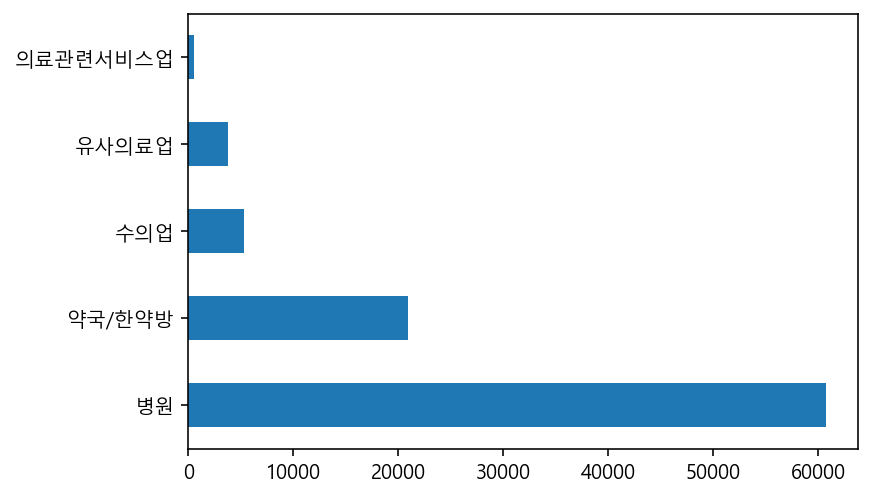

In [43]:
df["상권업종중분류명"].value_counts().plot.barh() # 원하는 데이터를 추출해 그래프로 표현

<AxesSubplot:ylabel='상권업종중분류명'>

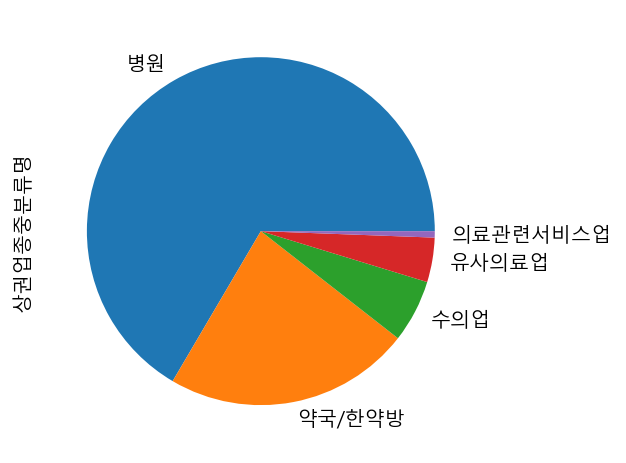

In [44]:
df["상권업종중분류명"].value_counts().plot.pie()

In [45]:
df["상권업종소분류명"].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<AxesSubplot:>

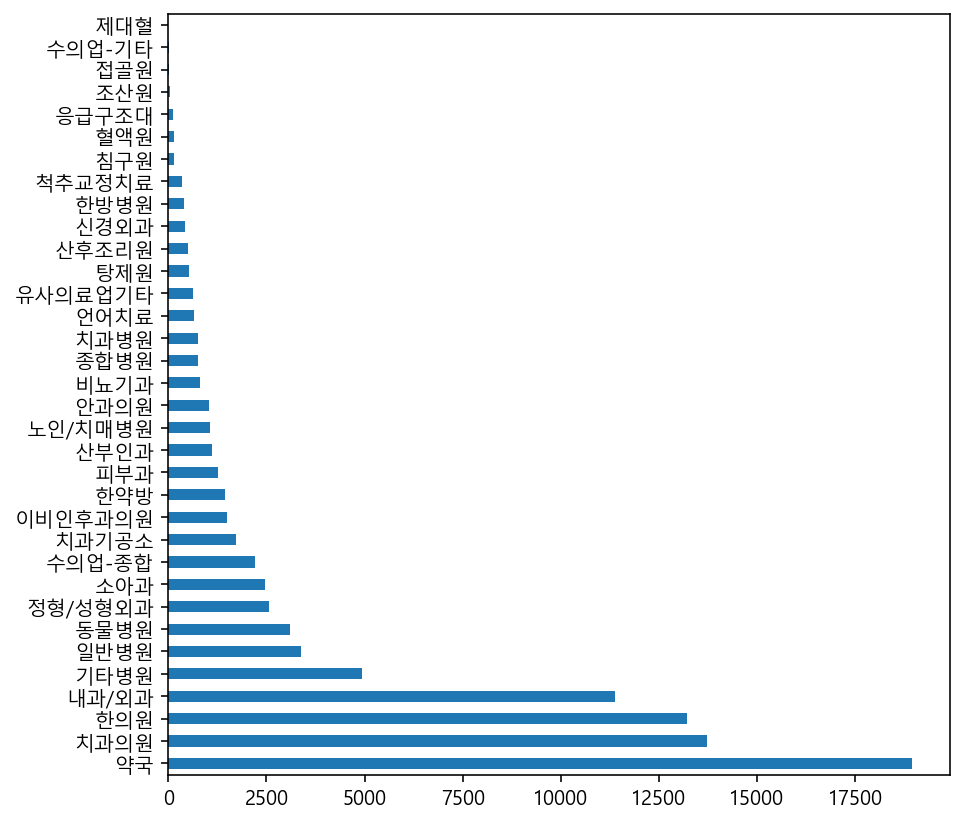

In [46]:
df["상권업종소분류명"].value_counts().plot.barh(figsize=(7, 7))

#### 데이터 색인

In [47]:
df_medical = df[df["상권업종중분류명"] == "약국/한약방"] #  "상권업종대분류명" 에서 "의료"만 가져옴
df_medical.head(20)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,32,4.150000e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,42.0,강원도,...,강원도 춘천시 중앙로2가 99,4.210000e+11,강원도 춘천시 낙원길,50,4.210000e+24,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,43.0,충청북도,...,충청북도 청주시 상당구 금천동 187-17,4.310000e+11,충청북도 청주시 상당구 중고개로337번길,134,4.310000e+24,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,4.890000e+11,경상남도 합천군 용주면 월평길,149,4.890000e+24,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,46.0,전라남도,...,전라남도 영암군 도포면 덕화리 296,4.680000e+11,전라남도 영암군 도포면 인덕길,75,4.680000e+24,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080
14,21201448,종은한약방,S,의료,S02,약국/한약방,S02A02,한약방,41.0,경기도,...,경기도 화성시 우정읍 조암리 350-6,4.160000e+11,경기도 화성시 우정읍 조암남로,19,4.160000e+24,경기도 화성시 우정읍 조암남로 19-1,445955.0,18567.0,126.817767,37.083139
15,21006553,상명약국,S,의료,S02,약국/한약방,S02A01,약국,47.0,경상북도,...,경상북도 경주시 성건동 340-4,4.710000e+11,경상북도 경주시 금성로,281,4.710000e+24,경상북도 경주시 금성로 281,780943.0,38156.0,129.206670,35.842804
16,21026027,햇살약국,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 안양시 동안구 비산동 1101-2,4.120000e+11,경기도 안양시 동안구 달안로,61,4.120000e+24,경기도 안양시 동안구 달안로 61,431719.0,14043.0,126.948953,37.396502
24,21228644,화정하나로,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 고양시 덕양구 화정동 969,4.130000e+11,경기도 고양시 덕양구 화정로,47,4.130000e+24,경기도 고양시 덕양구 화정로 47,412737.0,10497.0,126.831406,37.635165
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


In [48]:
shop_type = df["상권업종대분류명"] == "의료"
df.loc[shop_type, "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [49]:
# 위랑 동일기능
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [50]:
# 유사의료업 모으기
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 30)

In [51]:
df_medi

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
22,21013731,세종언어치료센터,S,의료,S03,유사의료업,S03B07,언어치료,26.0,부산광역시,...,부산광역시 금정구 구서동 84-1,2.640000e+11,부산광역시 금정구 중앙대로,1817,2.640000e+24,부산광역시 금정구 중앙대로 1817-11,609310.0,46273.0,129.091662,35.246528
40,20933900,고려수지침학회,S,의료,S03,유사의료업,S03B03,침구원,48.0,경상남도,...,경상남도 창원시 성산구 상남동 5-2,4.810000e+11,경상남도 창원시 성산구 마디미로4번길,9,4.810000e+24,경상남도 창원시 성산구 마디미로4번길 9,642832.0,51495.0,128.684678,35.224113
97,21717820,청명원,S,의료,S03,유사의료업,S03B09,유사의료업기타,43.0,충청북도,...,충청북도 괴산군 청안면 금신리 241,4.380000e+11,충청북도 괴산군 청안면 금신로1길,93,4.380000e+24,충청북도 괴산군 청안면 금신로1길 93,367831.0,28050.0,127.635740,36.768935
102,21865854,응급환자이송센터,S,의료,S03,유사의료업,S03B01,응급구조대,30.0,대전광역시,...,대전광역시 중구 대사동 248-237,3.010000e+11,대전광역시 중구 계룡로921번길,40,3.010000e+24,대전광역시 중구 계룡로921번길 40,301846.0,34946.0,127.417693,36.321801
108,21914637,태화아동발달지원센터,S,의료,S03,유사의료업,S03B07,언어치료,30.0,대전광역시,...,대전광역시 중구 문화동 27,3.010000e+11,대전광역시 중구 보문산로333번길,29,3.010000e+24,대전광역시 중구 보문산로333번길 29,301130.0,35020.0,127.412725,36.312953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91300,16131218,으뜸치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,48.0,경상남도,...,경상남도 진주시 수정동 39-11,4.820000e+11,경상남도 진주시 향교로18번길,8,4.820000e+24,경상남도 진주시 향교로18번길 8,660180.0,52753.0,128.084600,35.197029
91310,16199325,보령치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,11.0,서울특별시,...,서울특별시 성북구 동소문동4가 103-11,1.130000e+11,서울특별시 성북구 동소문로,47,1.130000e+24,서울특별시 성북구 동소문로 47-15,136821.0,2832.0,127.010602,37.591455
91311,16199088,점프셈교실,S,의료,S03,유사의료업,S03B09,유사의료업기타,47.0,경상북도,...,경상북도 경주시 황성동 446,4.710000e+11,경상북도 경주시 용담로104번길,16,4.710000e+24,경상북도 경주시 용담로104번길 16,780954.0,38084.0,129.211755,35.865600
91319,16108560,씨앤디자인치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,11.0,서울특별시,...,서울특별시 금천구 가산동 60-25,1.150000e+11,서울특별시 금천구 벚꽃로,234,1.150000e+24,서울특별시 금천구 벚꽃로 234,153798.0,8513.0,126.886122,37.475986


In [52]:
df["상호명"].value_counts().head(10) # 전국에서 가장많은 상호명 데이터 추출

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [53]:
df_medi["상호명"].value_counts().head(10) # 유사의료업에서 가장많은 상호명 데이터 추출

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

### 여러 조건으로 색인하기

In [54]:
df_seoul_drug = df[
    (df["상권업종소분류명"] == "약국") & 
    (df["시도명"]== "서울특별시")] # &으로 묶어주면 여러가지 조건을 동시에 만족하는 데이터만 추출 가능
df_seoul_drug.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강동구 둔촌동 630,1.170000e+11,서울특별시 강동구 명일로,172,1.170000e+24,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 중랑구 신내동 646,1.130000e+11,서울특별시 중랑구 신내로,211,1.130000e+24,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 성동구 행당동 346,1.120000e+11,서울특별시 성동구 행당로,82,1.120000e+24,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 동대문구 휘경동 286-121,1.120000e+11,서울특별시 동대문구 망우로18나길,3,1.120000e+24,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349


#### 구별로 보기

In [55]:
df_seoul_drug["시군구명"].value_counts() # 구별로 보기위해 시군구명으로 value counts 시행

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

In [56]:
df_seoul_drug["시군구명"].value_counts(normalize=True)

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: 시군구명, dtype: float64

<AxesSubplot:>

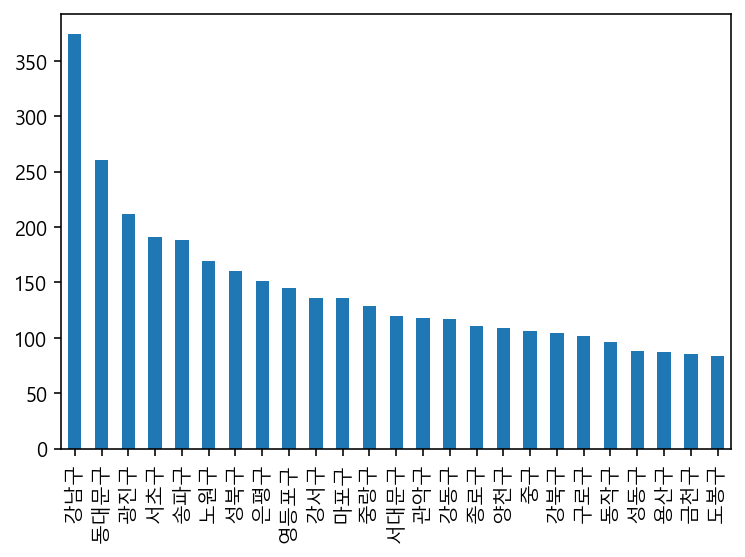

In [57]:
df_seoul_drug["시군구명"].value_counts().plot.bar() # 추출한 데이터를 bar 그래프로 표현

In [58]:
df_seoul_hospital = df[
    (df["상권업종소분류명"] == "종합병원") & 
    (df["시도명"]== "서울특별시")]  # 서울에 있는 종합병원만 추출해 df_esoul_hospatal에 저장
df_seoul_hospital.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 광진구 중곡동 58-25,1.120000e+11,서울특별시 광진구 긴고랑로,119,1.120000e+24,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 양천구 신정동 897-13,1.150000e+11,서울특별시 양천구 국회대로,250,1.150000e+24,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 강남구 역삼동 736-55,1.170000e+11,서울특별시 강남구 테헤란로26길,10,1.170000e+24,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 영등포구 여의도동 62,1.160000e+11,서울특별시 영등포구 63로,10,1.160000e+24,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 성동구 행당동 15-1,1.120000e+11,서울특별시 성동구 마조로,22,1.120000e+24,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469


In [59]:
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

In [60]:
type(df_seoul_hospital["시군구명"].value_counts())

pandas.core.series.Series

#### 텍스트 데이터 색인하기

In [61]:
# str.contains 를 사용해서 "상호명"에 "대학병원" 추출
df[df["상호명"].str.contains("대학병원")].head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
193,23651380,동국대학병원일산,S,의료,S01,병원,S01B01,종합병원,41.0,경기도,...,경기도 고양시 일산동구 식사동 814,4.130000e+11,경기도 고양시 일산동구 동국로,27,4.130000e+24,경기도 고양시 일산동구 동국로 27,410773.0,10326.0,126.805548,37.676425
363,20632155,경북대학병원응급센터9층,S,의료,S01,병원,S01B01,종합병원,27.0,대구광역시,...,대구광역시 중구 삼덕동2가 50,2.710000e+11,대구광역시 중구 동덕로,130,2.710000e+24,대구광역시 중구 동덕로 130,700721.0,41944.0,128.604263,35.866091
2216,25401601,대구보건대학병원치과,S,의료,S01,병원,S01B04,치과의원,27.0,대구광역시,...,대구광역시 북구 동천동 955-3,2.720000e+11,대구광역시 북구 동천로23길,30,2.720000e+24,대구광역시 북구 동천로23길 30-3,702886.0,41422.0,128.557075,35.942787
8308,24935585,서남대학병원,S,의료,S01,병원,S01B02,일반병원,29.0,광주광역시,...,광주광역시 북구 용봉동 1252-9,2.920000e+11,광주광역시 북구 설죽로202번길,79,2.920000e+24,광주광역시 북구 설죽로202번길 79,500844.0,61183.0,126.901868,35.177423
9727,24126873,순천향대학병원,S,의료,S01,병원,S01B02,일반병원,41.0,경기도,...,경기도 남양주시 가운동 313-1,4.140000e+11,경기도 남양주시 강변북로,805,4.140000e+24,경기도 남양주시 강변북로 805,472060.0,12249.0,127.173787,37.601450


In [62]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소 검색
df[df["도로명주소"].str.startswith("서울")].head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,1.170000e+11,서울특별시 강남구 언주로30길,39,1.170000e+24,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강남구 신사동 592-4,1.170000e+11,서울특별시 강남구 논현로,826,1.170000e+24,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,11.0,서울특별시,...,서울특별시 강남구 논현동 39-18,1.170000e+11,서울특별시 강남구 논현로131길,30,1.170000e+24,서울특별시 강남구 논현로131길 30,135010.0,6045.0,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강동구 성내동 9-5,1.170000e+11,서울특별시 강동구 천호대로,1032,1.170000e+24,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


In [63]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터 검색
df[df["상호명"].str.endswith("병원")].head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
5,20809147,행신동물병원,S,의료,S04,수의업,S04A02,동물병원,41.0,경기도,...,경기도 고양시 덕양구 행신동 647-14,4.130000e+11,경기도 고양시 덕양구 행신로,147,4.130000e+24,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,126.831632,37.619309
12,21145534,목포동물병원,S,의료,S04,수의업,S04A02,동물병원,46.0,전라남도,...,전라남도 목포시 산정동 1050-78,4.610000e+11,전라남도 목포시 영산로,200,4.610000e+24,전라남도 목포시 영산로 200-1,530806.0,58708.0,126.390244,34.799439
20,21085006,제일가축병원,S,의료,S04,수의업,S04A02,동물병원,41.0,경기도,...,경기도 남양주시 퇴계원면 퇴계원리 204-12,4.140000e+11,경기도 남양주시 퇴계원면 경춘북로558번길,7,4.140000e+24,경기도 남양주시 퇴계원면 경춘북로558번길 7-7,472821.0,12126.0,127.146600,37.647633
21,21128898,다사랑요양병원,S,의료,S01,병원,S01B17,노인/치매병원,26.0,부산광역시,...,부산광역시 북구 만덕동 136-2,2.630000e+11,부산광역시 북구 덕천로,339,2.630000e+24,부산광역시 북구 덕천로 339,616110.0,46610.0,129.040773,35.209154
25,21055738,축협동물병원,S,의료,S04,수의업,S04A02,동물병원,46.0,전라남도,...,전라남도 담양군 담양읍 백동리 342,4.670000e+11,전라남도 담양군 담양읍 삼거리길,8,4.670000e+24,전라남도 담양군 담양읍 삼거리길 8-6,517806.0,57347.0,126.981972,35.310645


#### 특정 지역만 보기

In [64]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 30)

<AxesSubplot:xlabel='count', ylabel='시군구명'>

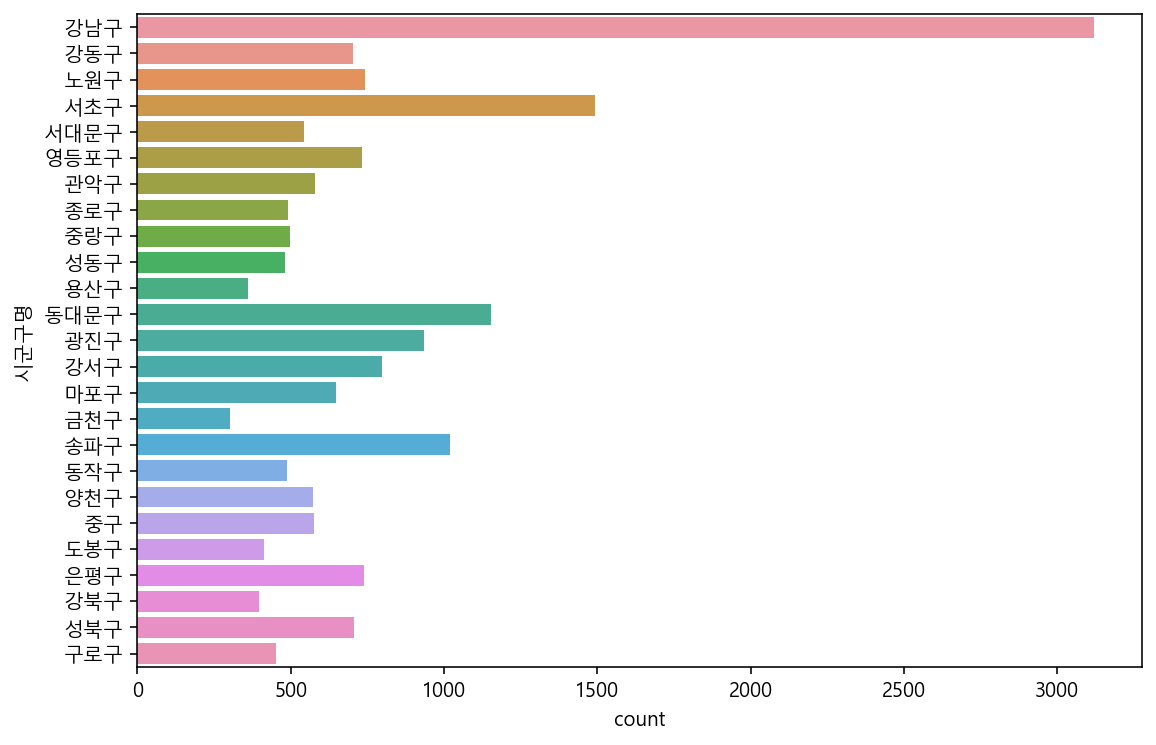

In [65]:
plt.figure(figsize=(9, 6))
sns.countplot(data=df_seoul, y="시군구명") # 서울특별시의 값만 추출해 시군구면으로 그래프를 출력

<AxesSubplot:xlabel='경도', ylabel='위도'>

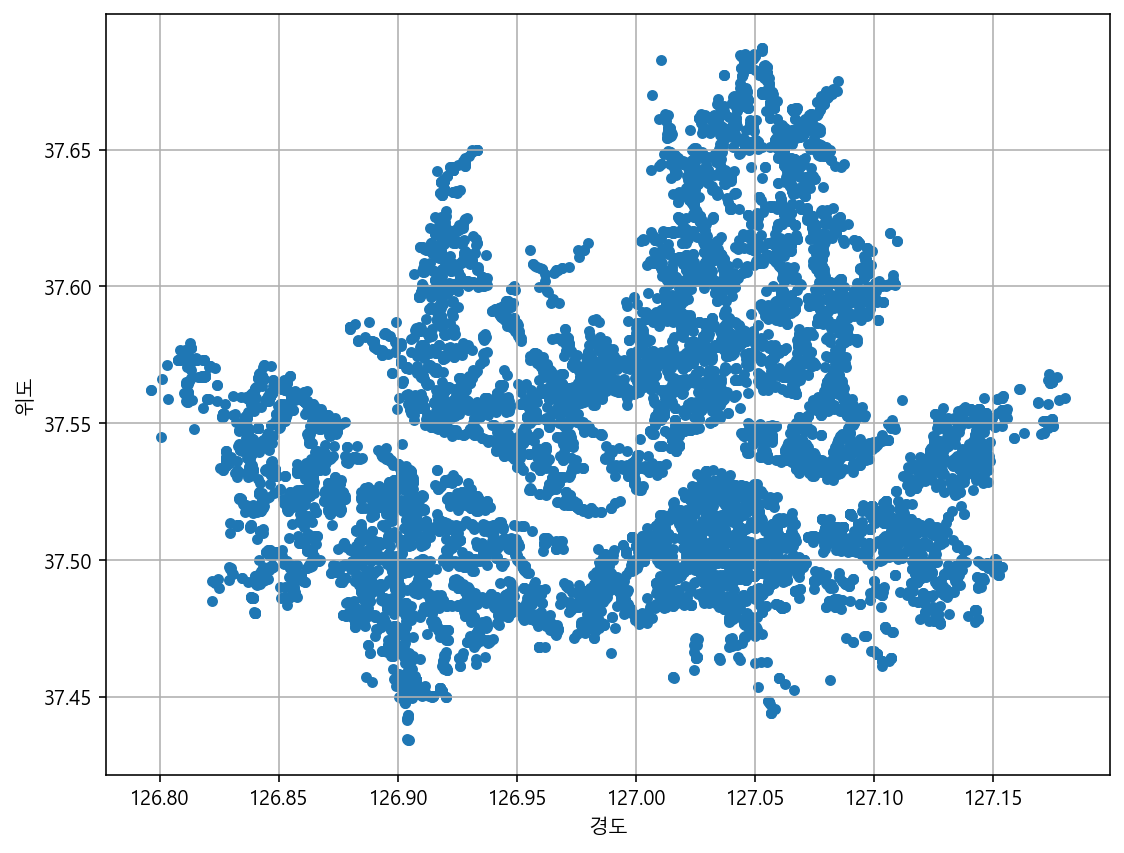

In [66]:
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(
    x="경도", y="위도", figsize=(9, 7), grid=True) # scatter 함수를 이용해 산점도로 그래프 출력

<AxesSubplot:xlabel='경도', ylabel='위도'>

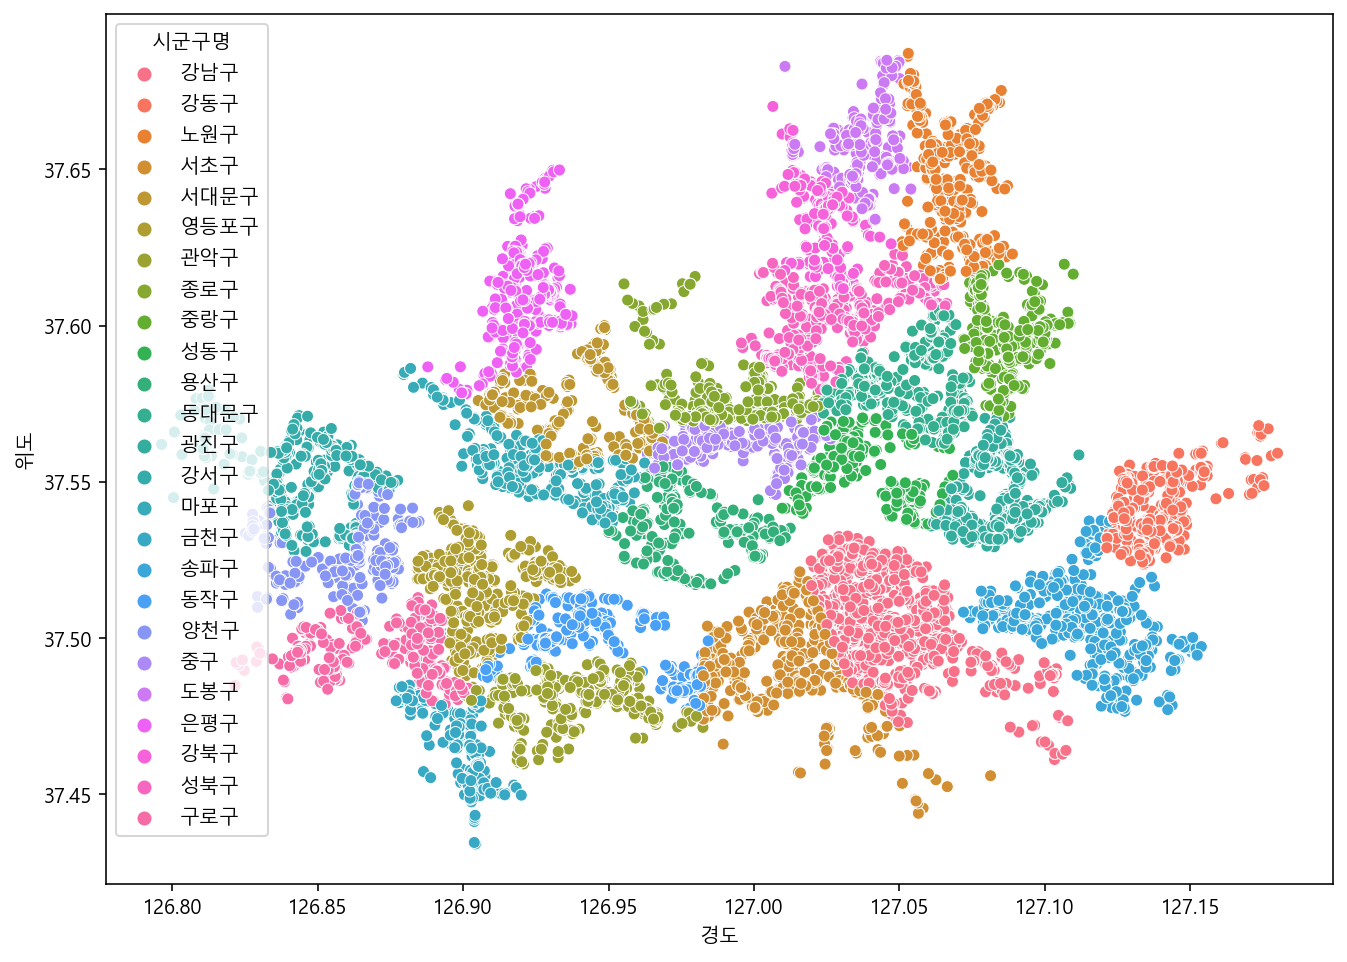

In [73]:
plt.figure(figsize=(11, 8))
sns.scatterplot(data=df_seoul, 
                x='경도', y='위도', hue='시군구명') # seaborn 라이브러리의 scatterplot 함수를 이용해 색갈로 지역을 나타냄

<AxesSubplot:xlabel='경도', ylabel='위도'>

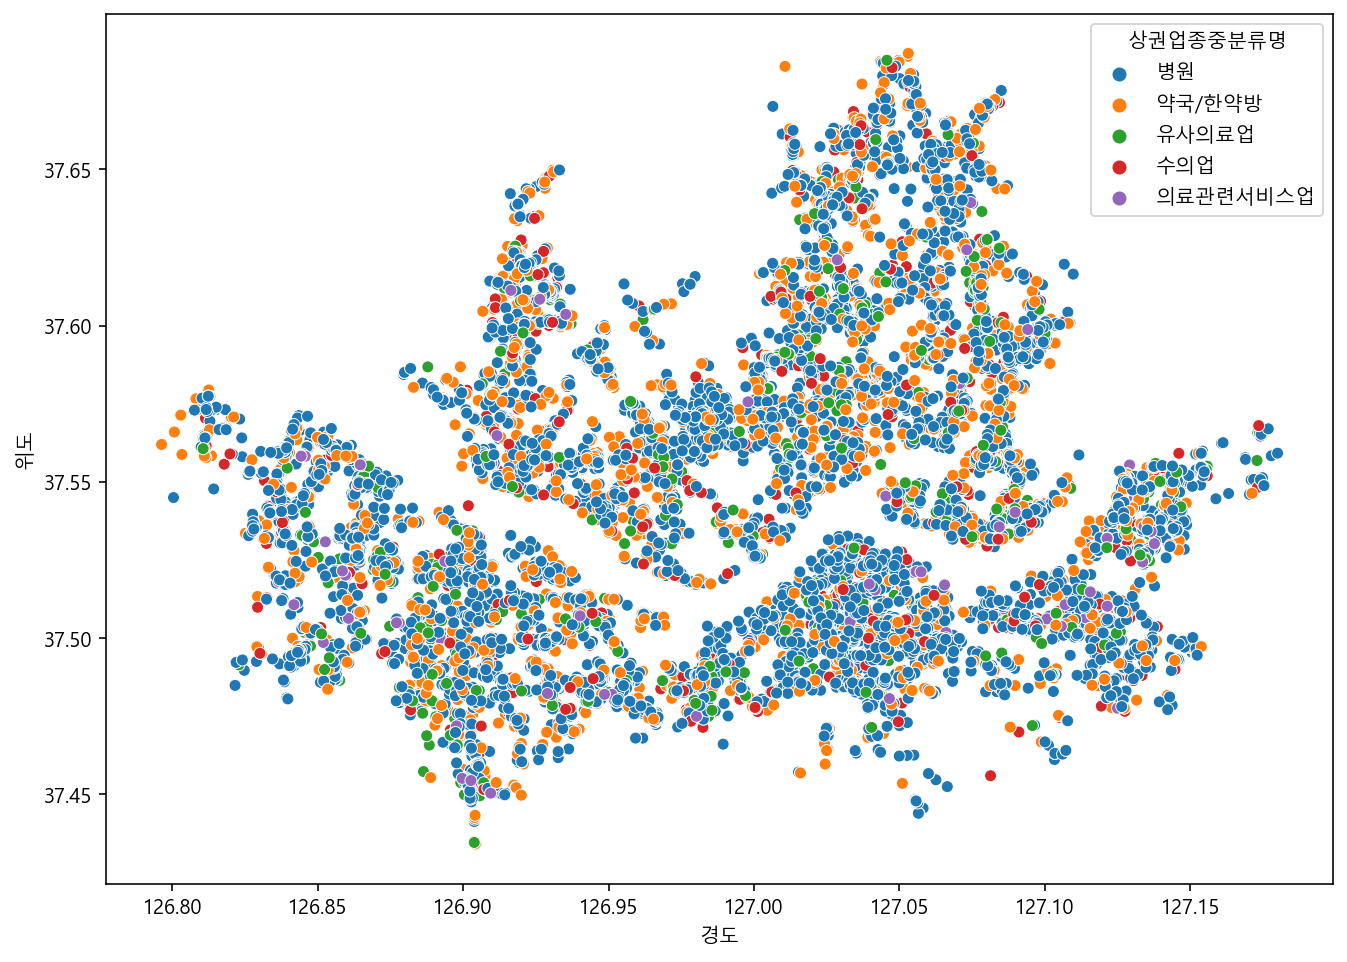

In [75]:
plt.figure(figsize=(11, 8))
sns.scatterplot(data=df_seoul, 
                x='경도', y='위도', hue="상권업종중분류명") #  hue에 상권업종중분류명을 넣어 지역별 업종을 확인

<AxesSubplot:xlabel='경도', ylabel='위도'>

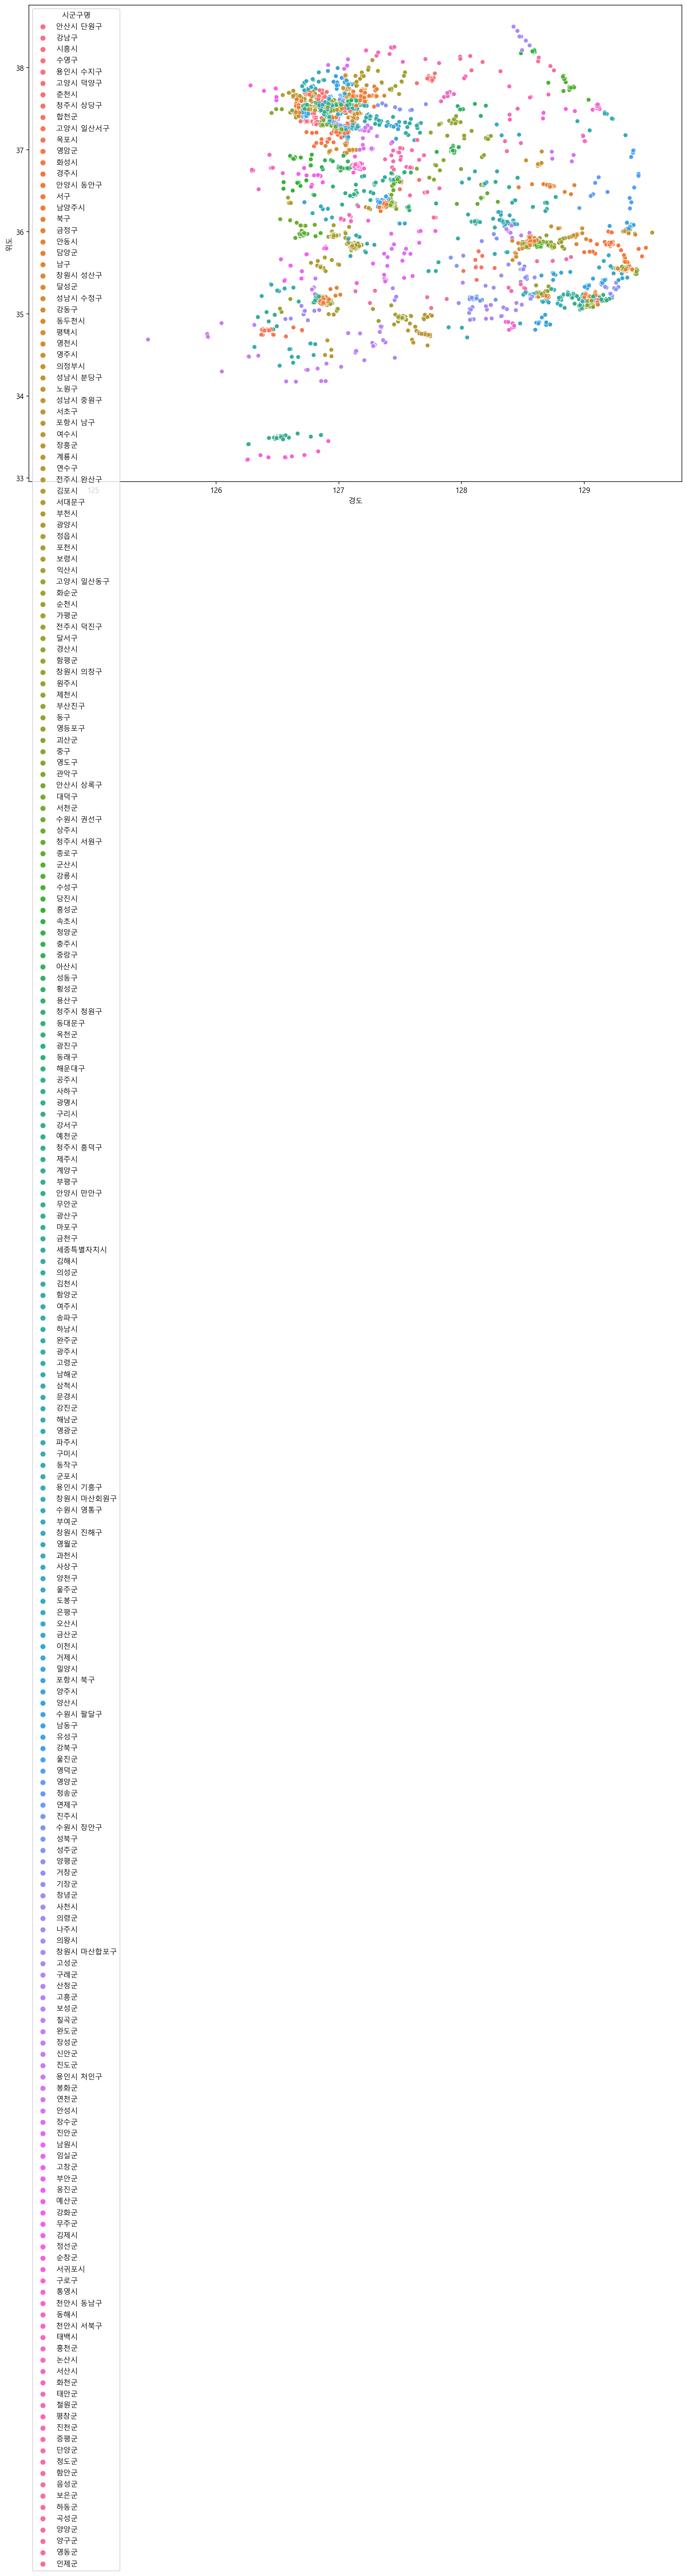

In [69]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df[:10000], 
                x='경도', y='위도', hue='시군구명')

### 지도시각화

In [70]:
import folium # 지도시각화 도구 folium 라이브러리를 import 해줌

In [71]:
geo_df = df_seoul_hospital.copy()

In [76]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정
    # 상호명과 주소를 붙여서 출력
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
    folium.Marker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        popup=('<pre>%s</pre>' %popup_name) # 가로로 출력되게 만듬
    ).add_to(map)


map